In [2]:
import numpy as np
import os
import pandas as pd
import scipy
import matplotlib.pyplot as plt

In [4]:
int_path = os.path.join(os.getcwd(), 'interCA')

opds = np.squeeze(pd.read_csv(os.path.join(int_path,'opds_CA.csv')).to_numpy())
hcms = np.squeeze(pd.read_csv(os.path.join(int_path,'hcms_CA.csv')).to_numpy())
# hcms = np.squeeze(pd.read_csv(os.path.join(int_path,'hcm55.csv')).to_numpy())

zeros_idx = [11, 27, 64, 77, 98, 151, 181, 189, 191, 200, 210, 243, 253]
opds = np.delete(opds, zeros_idx, axis=0)
hcms = np.delete(hcms, zeros_idx, axis=0)

hcm_corr = scipy.stats.pearsonr(hcms[:,0], hcms[:,1])
opd_corr = scipy.stats.pearsonr(opds[:,0], opds[:,1])

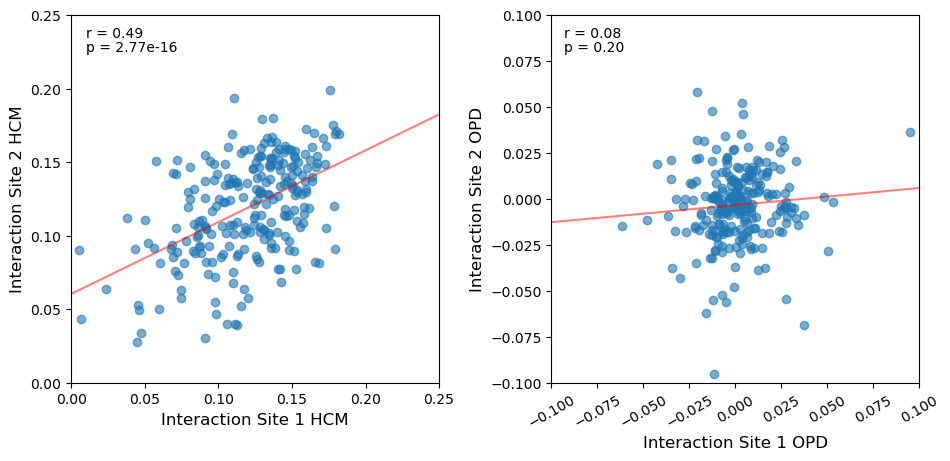

In [6]:
fsize=12

fig = plt.figure(figsize=plt.figaspect(0.5))

ax0 = fig.add_subplot(1, 2, 1)
ax0.scatter(hcms[:,0], hcms[:,1], alpha=0.6, edgecolors=None)

m, b = np.polyfit(hcms[:,0],hcms[:,1], 1)
x = np.linspace(0,0.25, 100)
ax0.plot(x, m*x + b, c='r', alpha=0.5)

ax0.grid(False)
ax0.axis('scaled')
ax0.set_xlim(0,0.25)
ax0.set_ylim(0,0.25)
ax0.set_xlabel('Interaction Site 1 HCM', fontsize=fsize)
ax0.set_ylabel('Interaction Site 2 HCM', fontsize=fsize)
ax0.annotate('r = %s' % float('%.2g' % hcm_corr[0]), (0.01, 0.235))
ax0.annotate('p = %s' % float('%.3g' % hcm_corr[1]), (0.01, 0.225))

ax2 = fig.add_subplot(1, 2, 2)

ax2.scatter(opds[:,0], opds[:,1], alpha=0.6, edgecolors=None)

m, b = np.polyfit(opds[:,0], opds[:,1], 1)
x = np.linspace(-0.1,0.1, 100)
ax2.plot(x, m*x + b, c='r', alpha=0.5)

ax2.grid(False)
ax2.axis('scaled')
ax2.set_xlim(-0.1,0.1)
ax2.set_ylim(-0.1,0.1)
ax2.set_xlabel('Interaction Site 1 OPD', fontsize=fsize)
ax2.set_ylabel('Interaction Site 2 OPD', fontsize=fsize)
ax2.annotate('r = %s' % float('%.1g' % opd_corr[0]), (-0.093,0.088))
ax2.annotate('p = 0.20', (-0.093,0.08))
ax2.tick_params(axis='x', labelrotation=30)
# ax2.annotate('p = %s' % float('%.2g' % opd_corr[1]), (-0.093,0.08))

plt.tight_layout()
plt.savefig('ints_CA.png', dpi=600)
plt.show()